# I. High-Level Outline and Brief Background section

## 1. Problem Statement

Higher education institutions face challenges in identifying students who are at risk of academic failure or dropping out. Traditional evaluation methods often rely on isolated metrics such as grades, overlooking demographic, socio-economic, and macroeconomic factors. This project aims to use unsupervised machine learning techniques to cluster students based on a broad set of characteristics, enabling the discovery of meaningful student profiles.

## 2. Why This Problem Is Important

Student dropout has significant academic, financial, and social consequences for students and institutions. Early identification of at-risk student groups allows universities to design targeted interventions, improve retention rates, optimize resource allocation, and enhance overall educational outcomes. Using clustering techniques helps uncover hidden patterns in student data that are not easily detectable through manual analysis.

## 3. Key Stakeholders

- Students – benefit from personalized academic support and early intervention
- University administrators – improve decision-making and retention strategies
- Academic advisors – identify student needs and tailor advising approaches
- Policy makers – design data-driven educational policies
- Researchers and data scientists – explore educational data mining techniques

# II. Data Section

In [75]:
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Change directory to your 'Colab Notebooks' folder
#    Make sure your file is in this folder
%cd /content/drive/MyDrive/Colab Notebooks

# 3. Verify the current directory
print(f"Current working directory: {os.getcwd()}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
Current working directory: /content/drive/MyDrive/Colab Notebooks


## 1. Import Libraries/Load Dataset

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("Studentnfo.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (4424, 36)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


## 2. Check for Missing Values

In [77]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]
print("Total missing values:", df.isna().sum().sum())


Total missing values: 0


## 3. Identify Categorical and Numerical Variables

In [78]:
categorical_features = df.select_dtypes(include=["object"]).columns
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

print("Categorical Features:", list(categorical_features))
print("Number of Numerical Features:", len(numerical_features))


Categorical Features: []
Number of Numerical Features: 36


## 4. Transform Categorical Variables (One-Hot Encoding)

In [79]:
# 1. List the columns that are actually categories (even if they look like numbers)
categorical_cols = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]

# 2. Convert them to strings so get_dummies recognizes them
for col in categorical_cols:
    df[col] = df[col].astype(str)

# 3. Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the result - you should see many more columns now (around ~238 columns)
print(f"New dataframe shape: {df_encoded.shape}")

New dataframe shape: (4424, 238)


## 5. Exploratory Data Analysis (EDA)

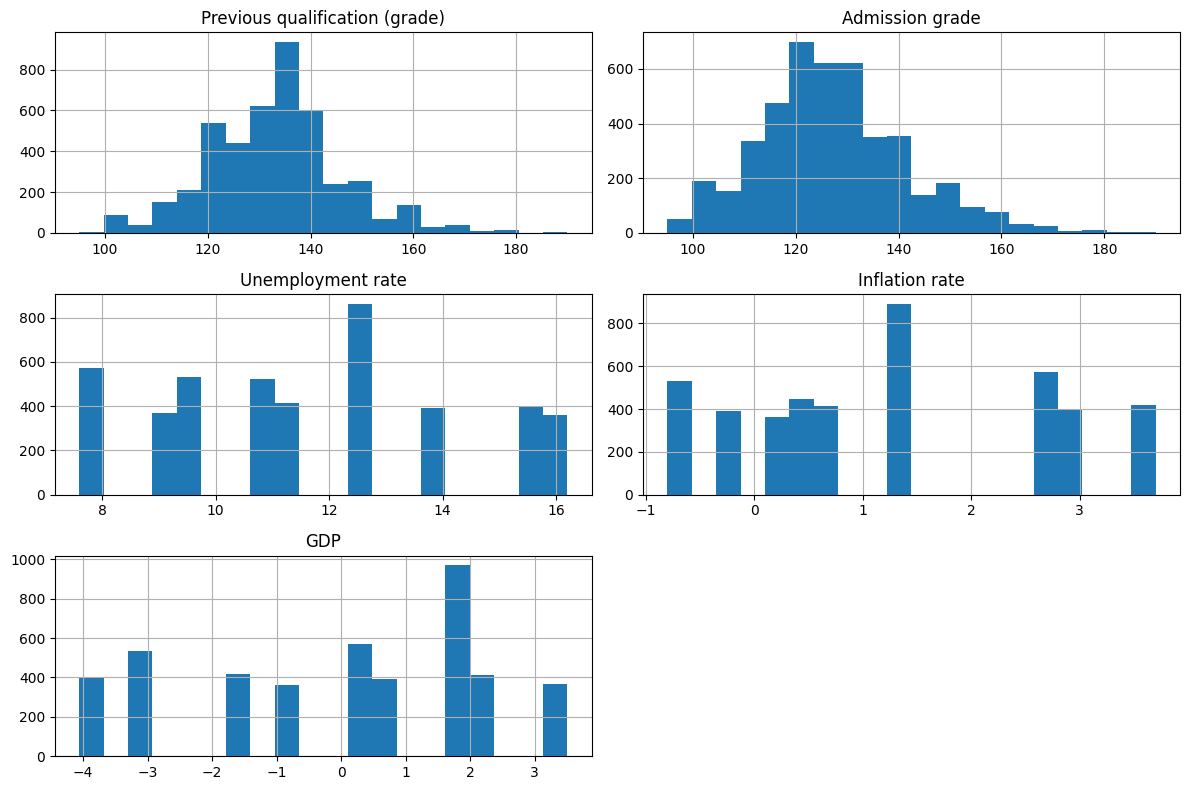

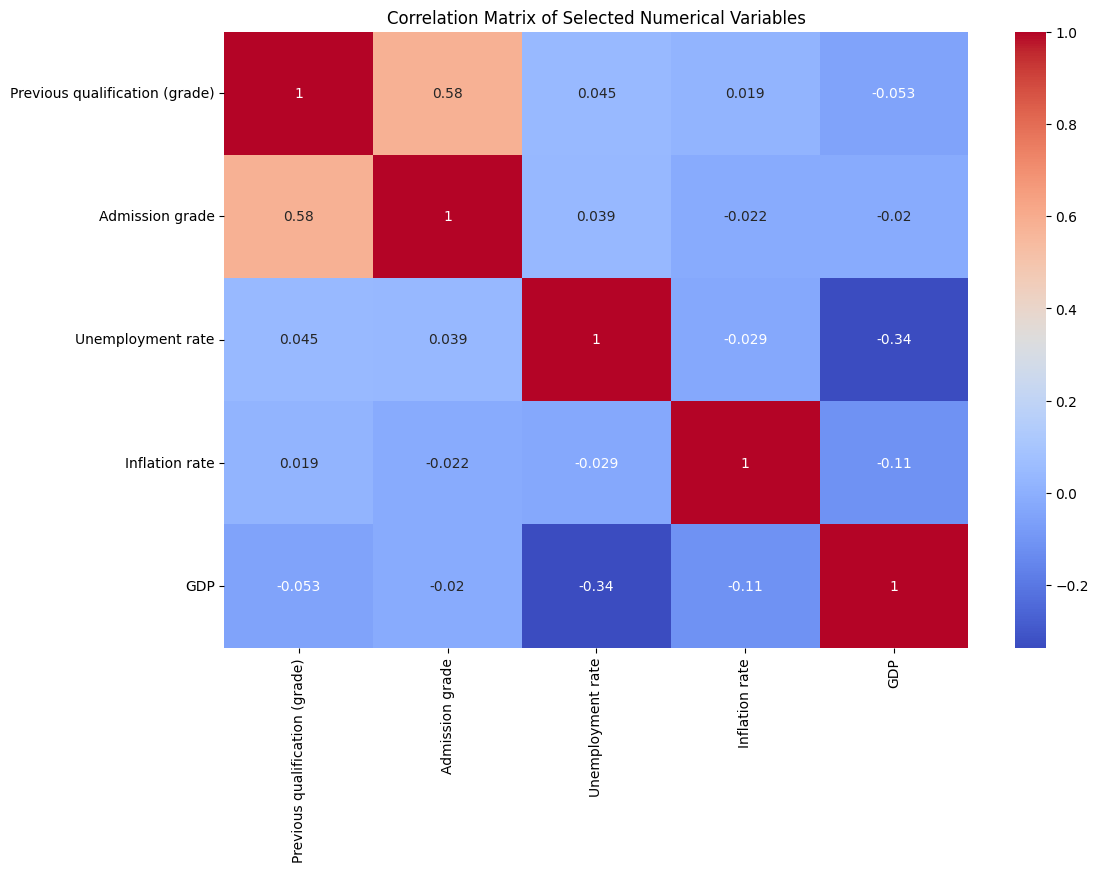

In [80]:
df.describe()

# Distribution of Selected Numerical Variables
numerical_sample = [
    'Previous qualification (grade)',
    'Admission grade',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

df[numerical_sample].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_sample].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()


## 6. Data Normalization

In [81]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

df_scaled.head()


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_9,Father's occupation_90,Father's occupation_99,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,2.490896,-0.804841,0.022229,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,...,1.838531,-0.122113,-0.065676,0.907512,-0.107993,-0.358167,0.368135,1.357640,-0.574914,-0.159682
1,-0.554068,2.076819,1.071926,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,...,-0.543912,-0.122113,-0.065676,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.159682
2,2.490896,-0.804841,-0.150419,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,...,1.838531,-0.122113,-0.065676,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.159682
3,0.207173,-0.804841,-0.509526,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.199273,...,-0.543912,-0.122113,-0.065676,0.907512,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,-0.159682
4,-0.554068,-2.473171,1.002867,2.864765,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.199273,...,1.838531,-0.122113,-0.065676,-1.101914,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,-0.159682


# III. Models

# III.1 KMeans Model

## 1. Process the Data

In [82]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

print("Final dataset shape:", X_scaled.shape)

Final dataset shape: (4424, 238)


## 2. Optimal K Selection (Elbow + Silhouette)

In [83]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))


## 3. Elbow Method Plot

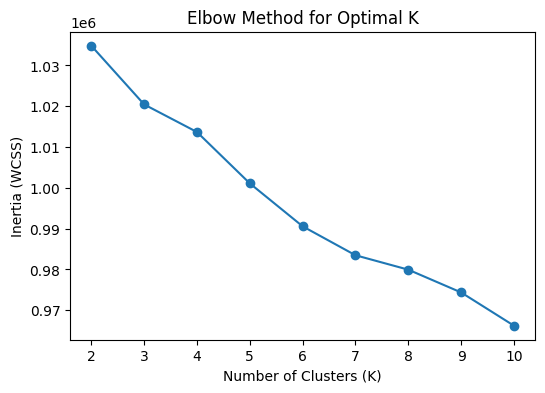

In [84]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


## 4. Silhouette Score Plot

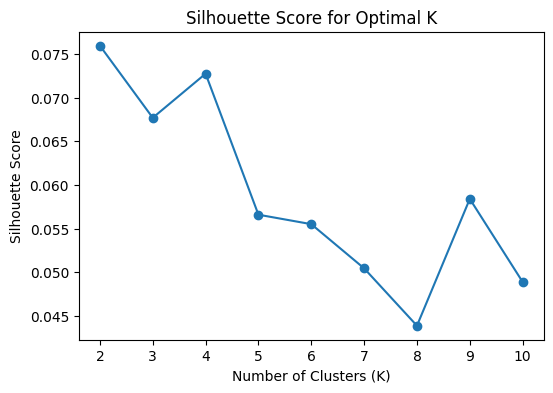

In [85]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()


## 5. Final KMeans Model/Centroid Information

In [86]:
optimal_k = 3

kmeans_final = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans_final.fit_predict(X_scaled)

centroids = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=df_encoded.columns
)

centroids



,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),...,Father's occupation_9,Father's occupation_90,Father's occupation_99,Displaced_1,Educational special needs_1,Debtor_1,Tuition fees up to date_1,Gender_1,Scholarship holder_1,International_1
0,0.209723,-0.012081,-0.068152,-0.444098,-0.269435,-0.029267,0.002623,0.207904,0.435615,-0.075363,...,-0.012806,-0.063344,-0.054293,0.223993,0.017516,-0.123693,0.206275,-0.176193,0.193362,0.010013
1,-0.261048,-0.048164,-0.022707,0.791715,-0.246111,-0.591897,-0.545010,-0.980833,-1.101417,0.086299,...,0.027339,0.157816,0.118270,-0.384837,-0.017845,0.215278,-0.453086,0.328168,-0.326224,-0.030931
2,-0.485711,0.188821,0.431509,0.420453,2.103820,1.666807,1.372612,1.356041,0.414224,0.193645,...,0.000646,-0.054267,-0.003259,-0.248933,-0.050639,0.130429,0.021913,0.131030,-0.230130,0.023807


## 6. Centroid Visualization (Heatmap)

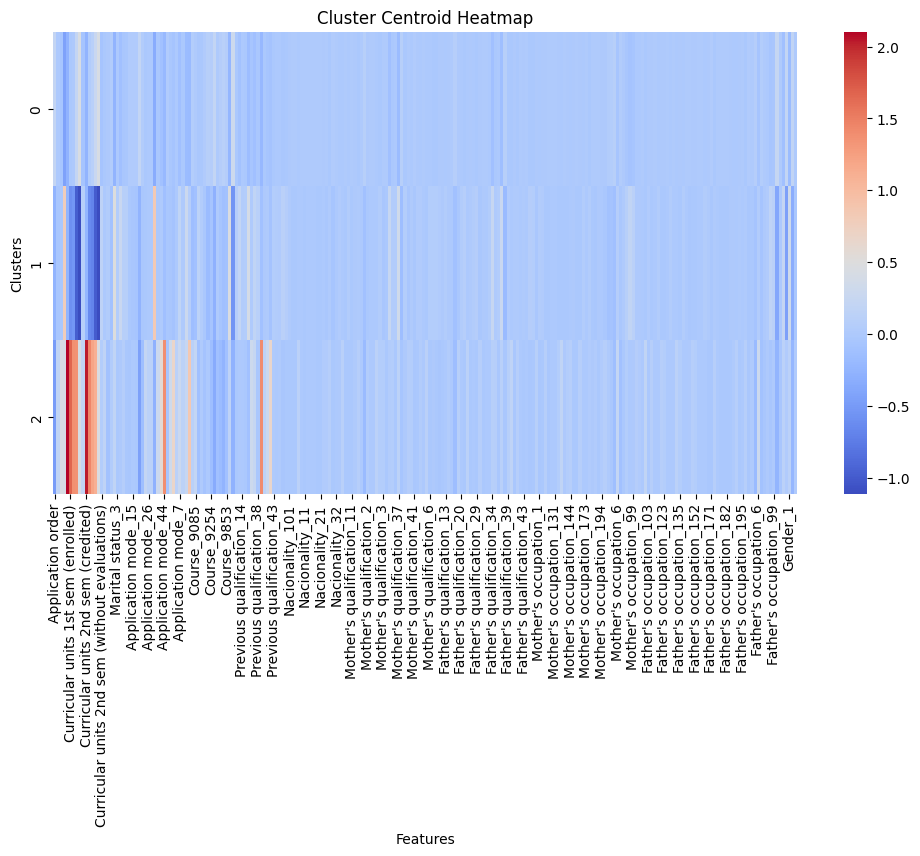

In [87]:
plt.figure(figsize=(12, 6))
sns.heatmap(centroids, cmap="coolwarm")
plt.title("Cluster Centroid Heatmap")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()


## 7. Cluster Distribution (Pie Chart)

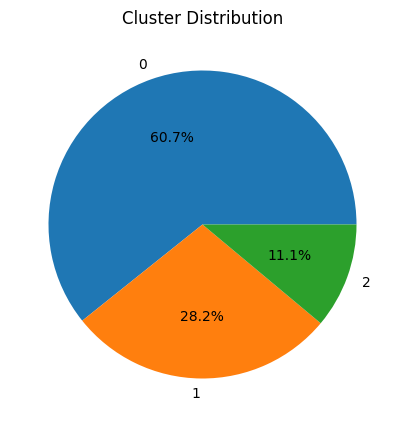

In [88]:
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Cluster Distribution")
plt.show()


## 8. Visualization Using Original Features (2D/3D Scatter Plot)

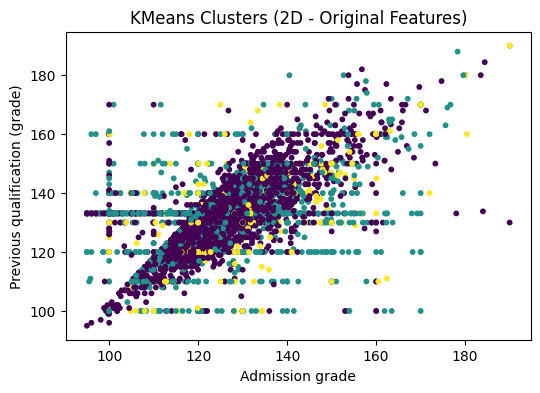

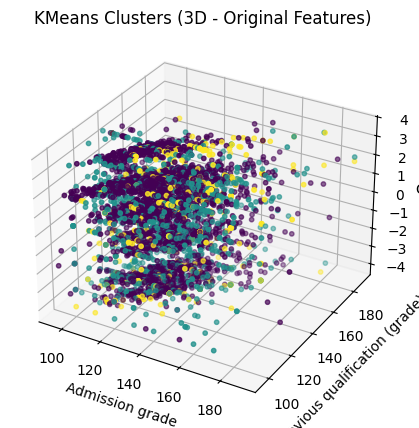

In [89]:
feature_x = "Admission grade"
feature_y = "Previous qualification (grade)"

plt.figure(figsize=(6, 4))
plt.scatter(
    df[feature_x],
    df[feature_y],
    c=cluster_labels,
    cmap='viridis',
    s=10
)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("KMeans Clusters (2D - Original Features)")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

feature_z = "GDP"

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df[feature_x],
    df[feature_y],
    df[feature_z],
    c=cluster_labels,
    cmap='viridis',
    s=10
)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.set_title("KMeans Clusters (3D - Original Features)")
plt.show()


## 9. Visualization Using PCA (PCA Transformation/2D/3D)

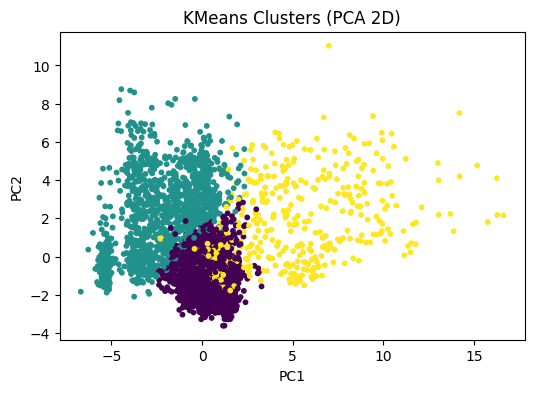

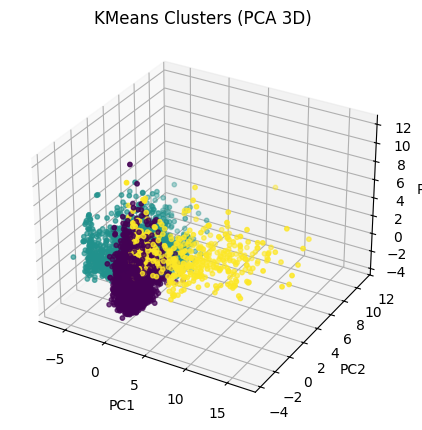

In [90]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=10
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (PCA 2D)")
plt.show()


fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca_3[:, 0],
    X_pca_3[:, 1],
    X_pca_3[:, 2],
    c=cluster_labels,
    cmap='viridis',
    s=10
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("KMeans Clusters (PCA 3D)")
plt.show()



# III.2 Hierarchical Clustering

## 1. Hierarchical Clustering Creation + Dendrogram

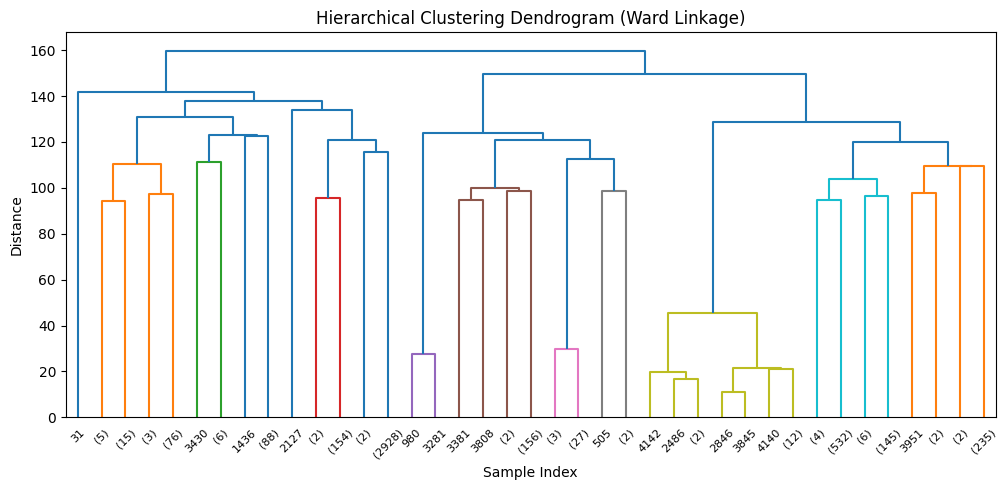

In [91]:
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 5))
dendrogram(
    linkage_matrix,
    truncate_mode="level",
    p=5
)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


## 2. Determine Number of Clusters + Silhouette Score

In [92]:
n_clusters = 3

hierarchical_model = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

cluster_labels_hc = hierarchical_model.fit_predict(X_scaled)


sil_score_hc = silhouette_score(X_scaled, cluster_labels_hc)
print("Silhouette Score (Hierarchical Clustering):", sil_score_hc)


Silhouette Score (Hierarchical Clustering): 0.10006366792073422


## 3. Cluster Mean Visualization

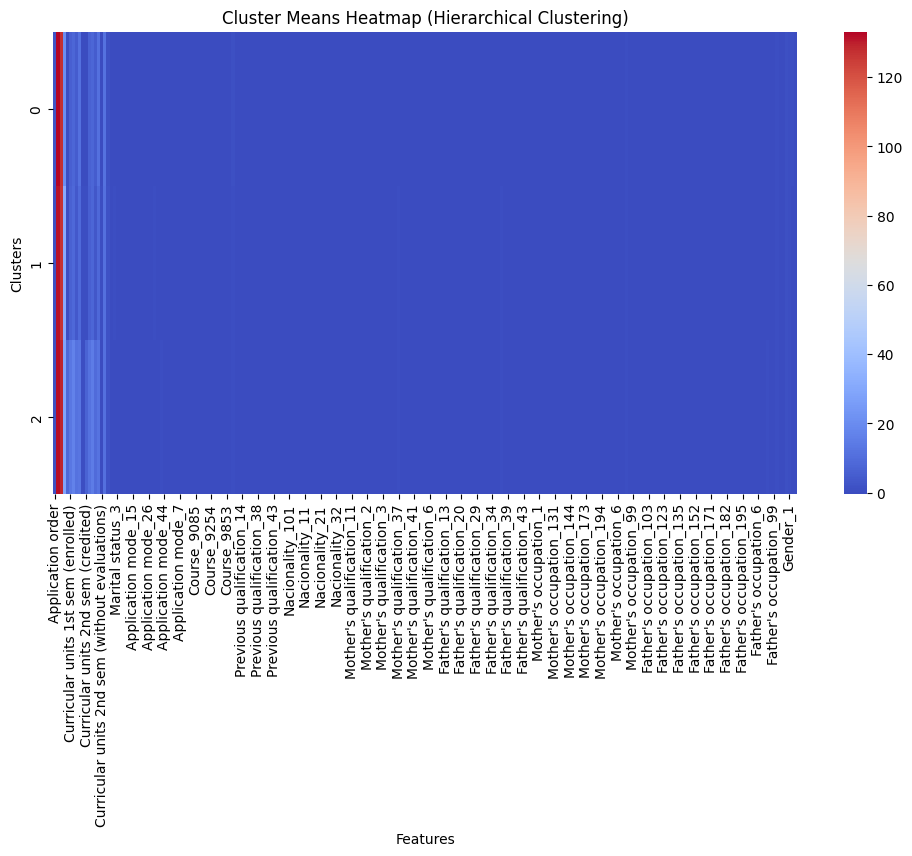

In [93]:
df_clustered = df_encoded.copy()
df_clustered["Cluster"] = cluster_labels_hc

cluster_means = df_clustered.groupby("Cluster").mean()
cluster_means.head()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, cmap="coolwarm")
plt.title("Cluster Means Heatmap (Hierarchical Clustering)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()


## 4. Cluster Distrubution

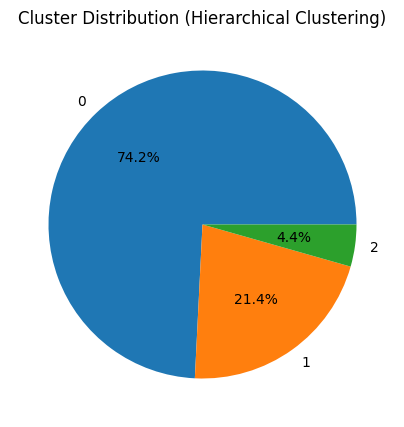

In [94]:
cluster_counts = pd.Series(cluster_labels_hc).value_counts().sort_index()

plt.figure(figsize=(5, 5))
plt.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct='%1.1f%%'
)
plt.title("Cluster Distribution (Hierarchical Clustering)")
plt.show()


## 5. Visualization Using Original Features (2D/3D Scatter Plot)

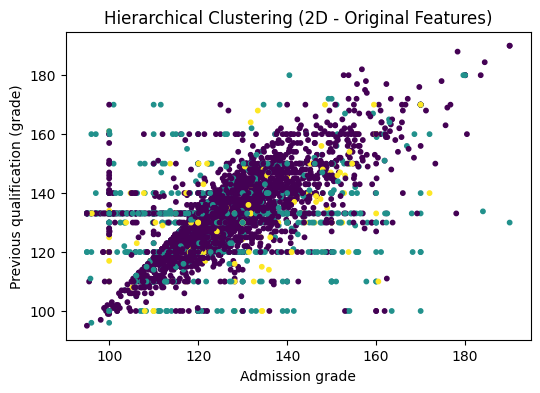

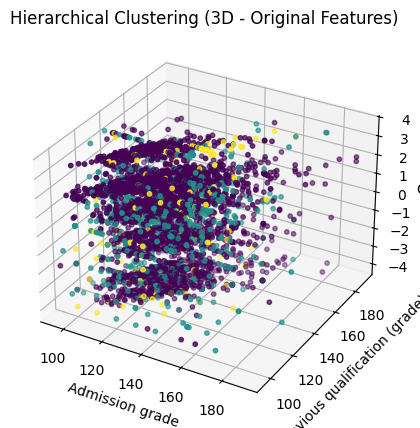

In [95]:
feature_x = "Admission grade"
feature_y = "Previous qualification (grade)"

plt.figure(figsize=(6, 4))
plt.scatter(
    df[feature_x],
    df[feature_y],
    c=cluster_labels_hc,
    cmap="viridis",
    s=10
)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Hierarchical Clustering (2D - Original Features)")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

feature_z = "GDP"

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df[feature_x],
    df[feature_y],
    df[feature_z],
    c=cluster_labels_hc,
    cmap="viridis",
    s=10
)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.set_title("Hierarchical Clustering (3D - Original Features)")
plt.show()


## 6. Visualization Using PCA (2D/3D Visualization)

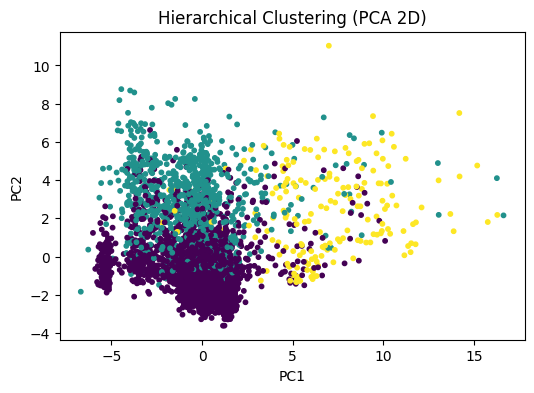

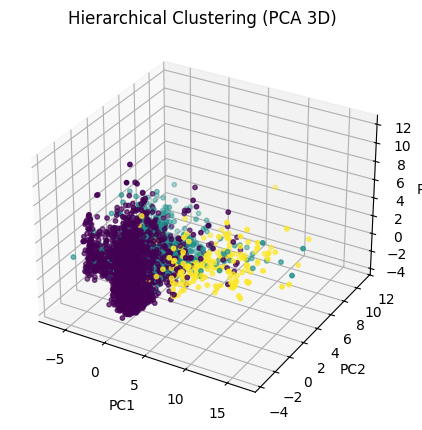

In [96]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(
    X_pca_2[:, 0],
    X_pca_2[:, 1],
    c=cluster_labels_hc,
    cmap="viridis",
    s=10
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering (PCA 2D)")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    X_pca_3[:, 0],
    X_pca_3[:, 1],
    X_pca_3[:, 2],
    c=cluster_labels_hc,
    cmap="viridis",
    s=10
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Hierarchical Clustering (PCA 3D)")
plt.show()


# III.3 DBSCAN

## 1. Preprocessing

In [97]:
# Cell 2: one-hot encode categorical variables and scale features
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded shape:", df_encoded.shape)

# Keep a copy of encoded (unscaled) for interpretable cluster means
df_encoded_unscaled = df_encoded.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)  # matrix to use with DBSCAN

print("Scaled shape:", X_scaled.shape)


Encoded shape: (4424, 238)
Scaled shape: (4424, 238)


## 2. Grid search for DBSCAN parameters (eps, min_samples)

In [98]:
# Cell 3: grid search for DBSCAN parameters
from itertools import product

eps_values = np.arange(2, 6, 1)           # [2,3,4,5] as requested
min_samples_values = range(10, 25, 5)    # [10,15,20]

best_score = -np.inf
best_params = None
results = []

for eps, min_s in product(eps_values, min_samples_values):
    db = DBSCAN(eps=eps, min_samples=min_s)
    labels = db.fit_predict(X_scaled)
    # count clusters (exclude noise label -1)
    unique_labels = set(labels)
    n_clusters = len([lab for lab in unique_labels if lab != -1])

    # only compute silhouette when there are at least 2 clusters
    if n_clusters >= 2:
        try:
            score = silhouette_score(X_scaled, labels)
        except Exception as e:
            score = np.nan
    else:
        score = np.nan

    results.append({
        "eps": eps,
        "min_samples": min_s,
        "n_clusters": n_clusters,
        "silhouette": score
    })

    # update best
    if not np.isnan(score) and score > best_score:
        best_score = score
        best_params = {"eps": eps, "min_samples": min_s, "n_clusters": n_clusters, "silhouette": score}

results_df = pd.DataFrame(results).sort_values(by="silhouette", ascending=False)
print("Top grid-search results:")
display(results_df.head(10))

if best_params:
    print("Best params found:", best_params)
else:
    print("No parameter combination produced >=2 clusters; consider adjusting eps/min_samples grid.")


Top grid-search results:


,eps,min_samples,n_clusters,silhouette
10,5,15,5,-0.281649
11,5,20,3,-0.282408
9,5,10,10,-0.291278
6,4,10,3,-0.302810
0,2,10,0,NaN
1,2,15,0,NaN
2,2,20,0,NaN
3,3,10,0,NaN
4,3,15,0,NaN
5,3,20,0,NaN


Best params found: {'eps': np.int64(5), 'min_samples': 15, 'n_clusters': 5, 'silhouette': np.float64(-0.2816492952332003)}


## 3. Fit final DBSCAN with best parameters (or fallback)

In [99]:
# Cell 4: fit final DBSCAN (use best found or choose a fallback)
if best_params is None:
    # fallback: choose a moderate setting and warn
    print("Falling back to eps=3, min_samples=10 (no valid silhouette found during grid search).")
    best_eps = 3
    best_min_samples = 10
else:
    best_eps = best_params["eps"]
    best_min_samples = best_params["min_samples"]

db_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_final = db_final.fit_predict(X_scaled)

# attach to dataframe for analysis
df_clustered = df_encoded_unscaled.copy()
df_clustered["Cluster"] = labels_final

cluster_counts = df_clustered["Cluster"].value_counts().sort_index()
print("Cluster counts (include -1 for noise if present):")
print(cluster_counts)


Cluster counts (include -1 for noise if present):
Cluster
-1    4131
 0     207
 1      28
 2      17
 3      24
 4      17
Name: count, dtype: int64


## 4. Cluster means and heatmap / bar chart

Cluster means (first 10 features shown for readability):


,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations)
Cluster,,,,,,,,,,
-1,1.680707,132.380586,126.892714,23.484870,0.759622,6.228758,8.330186,4.602760,10.457979,0.146212
0,2.560386,136.684541,127.997101,19.246377,0.000000,7.159420,8.033816,6.439614,13.360775,0.014493
1,2.785714,135.464286,126.439286,18.857143,0.107143,7.428571,8.107143,6.892857,13.312258,0.000000
2,1.705882,134.947059,130.558824,19.470588,0.000000,5.352941,7.352941,5.000000,14.104331,0.117647
3,1.916667,135.291667,131.591667,18.625000,0.000000,6.000000,6.500000,5.833333,13.196627,0.000000
4,1.058824,128.782353,126.117647,36.411765,0.000000,5.000000,7.764706,3.352941,10.480392,0.000000


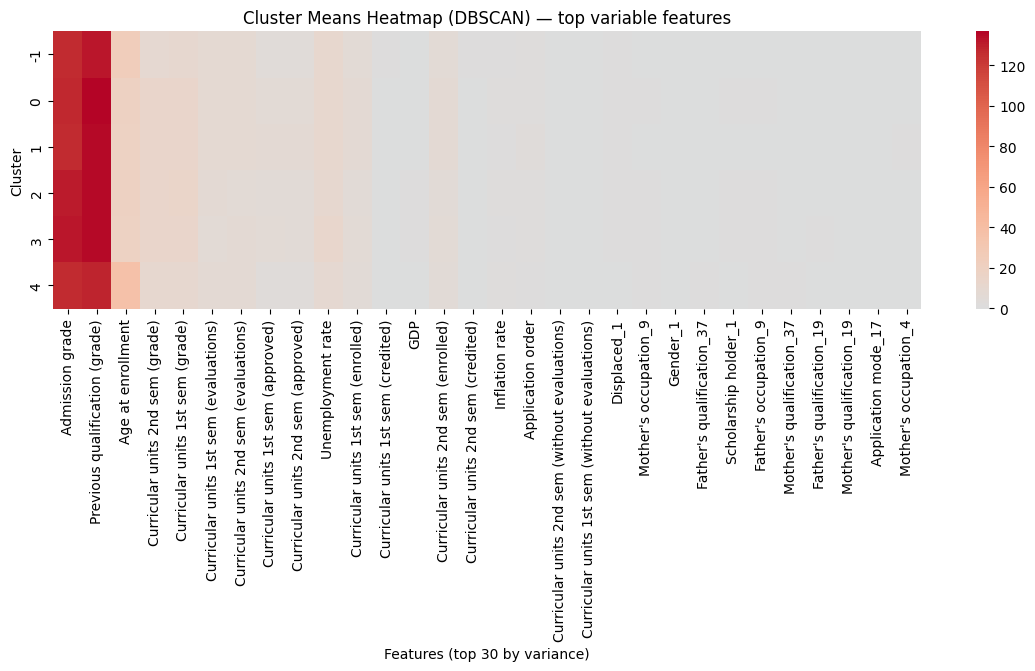

Representative features for bar charts: ['Admission grade', 'Previous qualification (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']


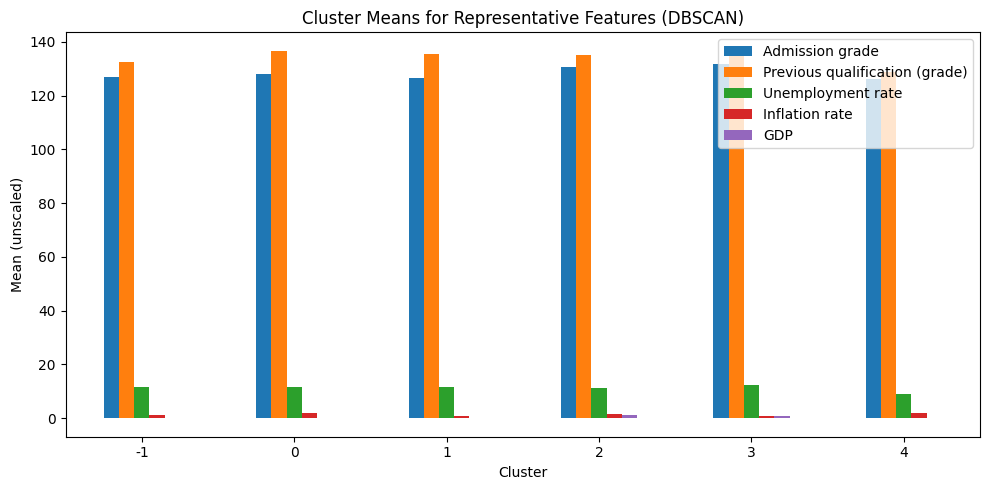

In [100]:
# Cell 5: cluster means table
cluster_means = df_clustered.groupby("Cluster").mean()
print("Cluster means (first 10 features shown for readability):")
display(cluster_means.iloc[:, :10])   # show subset to keep output readable

# Heatmap of cluster means (use a subset of most variable features to keep figure readable)
# select top 30 features by variance for visualization (or all if fewer)
feature_variances = df_encoded_unscaled.var().sort_values(ascending=False)
top_features = list(feature_variances.index[:30])  # top 30 variable features

plt.figure(figsize=(14, max(3, cluster_means.shape[0]*0.6)))
sns.heatmap(cluster_means[top_features], cmap="coolwarm", center=0)
plt.title("Cluster Means Heatmap (DBSCAN) — top variable features")
plt.xlabel("Features (top 30 by variance)")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# Bar chart for a short set of interpretable features (choose 6 representative features)
# Ensure features exist in df_encoded_unscaled; select gracefully
representative = []
for col in ["Admission grade", "Previous qualification (grade)", "Unemployment rate", "Inflation rate", "GDP"]:
    if col in df_encoded_unscaled.columns:
        representative.append(col)

# If not present as-is (some features are numeric in original df, but after get_dummies their names remain),
# fall back to selecting top numeric columns from original df
if len(representative) < 3:
    # choose numeric columns from original df
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    representative = numeric_cols[:5]

print("Representative features for bar charts:", representative)

cluster_means_representative = df_clustered.groupby("Cluster")[representative].mean()

cluster_means_representative.plot(kind="bar", figsize=(10,5))
plt.title("Cluster Means for Representative Features (DBSCAN)")
plt.ylabel("Mean (unscaled)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 5. Cluster distribution pie chart (including noise)

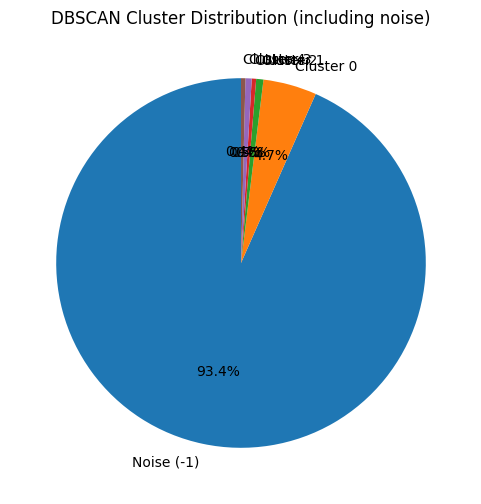

In [101]:
# Cell 6: pie chart of cluster distribution (including noise -1)
counts = cluster_counts.copy()
labels = [f"Cluster {int(c)}" if c != -1 else "Noise (-1)" for c in counts.index]
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("DBSCAN Cluster Distribution (including noise)")
plt.show()


## 6. 2D and 3D visualizations using original features

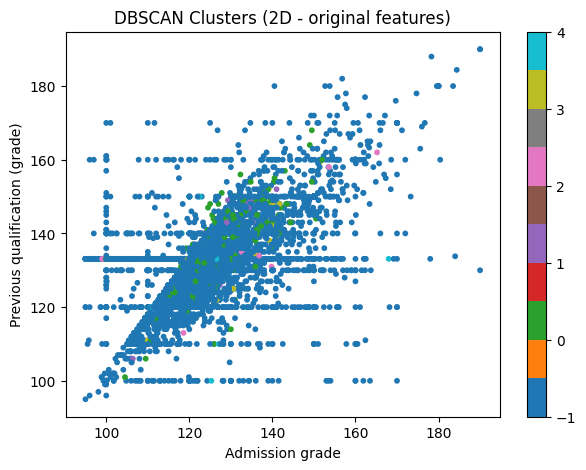

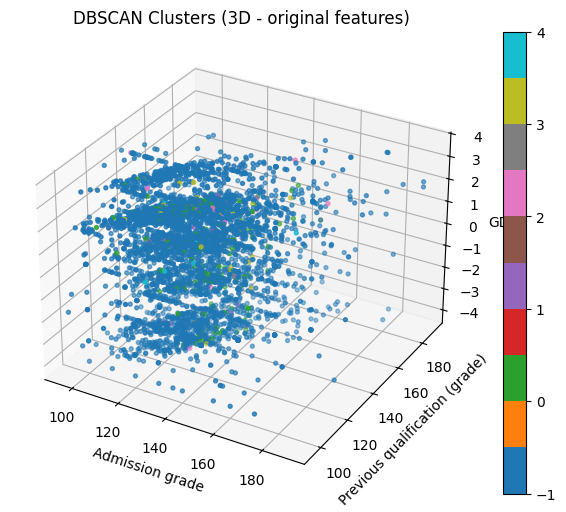

In [102]:
# Cell 7: Visualize using original features (2D and 3D)
# Choose 2D features: Admission grade vs Previous qualification (grade) if available
feat_x = "Admission grade"
feat_y = "Previous qualification (grade)"
feat_z = "GDP"

# Fall back to numeric columns if not found
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if feat_x not in numeric_cols or feat_y not in numeric_cols:
    feat_x, feat_y = numeric_cols[0], numeric_cols[1]
    print("Falling back to numeric features:", feat_x, feat_y)

if feat_z not in numeric_cols:
    feat_z = numeric_cols[2] if len(numeric_cols) > 2 else numeric_cols[0]

# 2D scatter
plt.figure(figsize=(7,5))
scatter = plt.scatter(df[feat_x], df[feat_y], c=labels_final, cmap="tab10", s=10)
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title("DBSCAN Clusters (2D - original features)")
plt.colorbar(scatter, ticks=sorted(set(labels_final)))
plt.show()

# 3D scatter
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df[feat_x], df[feat_y], df[feat_z], c=labels_final, cmap="tab10", s=8)
ax.set_xlabel(feat_x)
ax.set_ylabel(feat_y)
ax.set_zlabel(feat_z)
ax.set_title("DBSCAN Clusters (3D - original features)")
fig.colorbar(p, ax=ax, ticks=sorted(set(labels_final)))
plt.show()


## 7. PCA visualizations (2D + 3D)

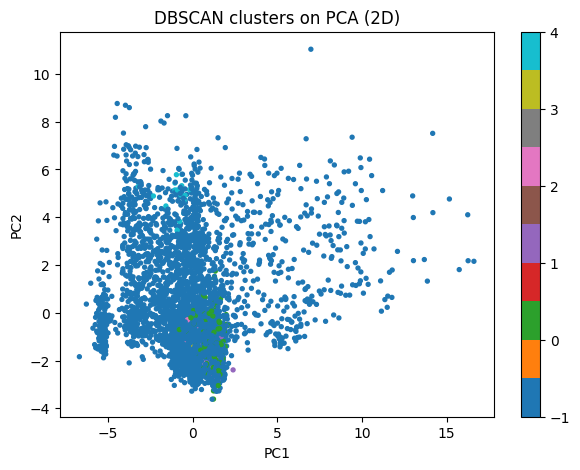

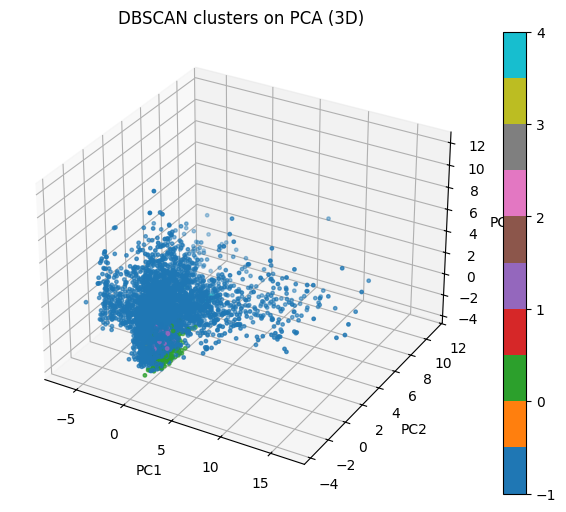

In [103]:
# Cell 8: PCA-based visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# PCA 2D
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_final, s=8, cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN clusters on PCA (2D)")
plt.colorbar(ticks=sorted(set(labels_final)))
plt.show()

# PCA 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_final, s=6, cmap="tab10")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("DBSCAN clusters on PCA (3D)")
fig.colorbar(p, ax=ax, ticks=sorted(set(labels_final)))
plt.show()


## 8. Summary of results and recommended next steps

In [104]:
# Cell 9: Summary prints
print("Final DBSCAN parameters used: eps =", best_eps, ", min_samples =", best_min_samples)
unique_final = set(labels_final)
n_clusters_final = len([l for l in unique_final if l != -1])
has_noise = (-1 in unique_final)
print("Number of clusters found (excluding noise):", n_clusters_final)
print("Noise present:", has_noise)
if best_params:
    print("Best silhouette from grid search: {:.4f} (eps={}, min_samples={})".format(
        best_params["silhouette"], best_params["eps"], best_params["min_samples"]
    ))
else:
    print("No valid silhouette score produced during grid search with the given grid.")

# If silhouette is valid for final labels, print it
try:
    if n_clusters_final >= 2:
        final_sil = silhouette_score(X_scaled, labels_final)
        print("Silhouette score for final DBSCAN clustering: {:.4f}".format(final_sil))
    else:
        print("Silhouette score not computed for final clustering (requires >=2 clusters).")
except Exception as e:
    print("Silhouette computation failed:", e)

print("\nCluster counts:")
print(cluster_counts)


Final DBSCAN parameters used: eps = 5 , min_samples = 15
Number of clusters found (excluding noise): 5
Noise present: True
Best silhouette from grid search: -0.2816 (eps=5, min_samples=15)
Silhouette score for final DBSCAN clustering: -0.2816

Cluster counts:
Cluster
-1    4131
 0     207
 1      28
 2      17
 3      24
 4      17
Name: count, dtype: int64


# IV. Conclusion

In [106]:
# Compute Silhouette Scores for All Methods

# KMeans silhouette score
sil_kmeans = silhouette_score(X_scaled, cluster_labels)

# Hierarchical silhouette score
sil_hierarchical = silhouette_score(X_scaled, cluster_labels_hc)

# DBSCAN silhouette score (only if >= 2 clusters excluding noise)
labels_db = labels_final
unique_db = set(labels_db)
n_clusters_db = len([l for l in unique_db if l != -1])

if n_clusters_db >= 2:
    sil_dbscan = silhouette_score(X_scaled, labels_db)
else:
    sil_dbscan = np.nan

silhouette_summary = pd.DataFrame({
    "Clustering Method": ["KMeans", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_kmeans, sil_hierarchical, sil_dbscan],
    "Clusters Found": [
        len(set(cluster_labels)),
        len(set(cluster_labels_hc)),
        n_clusters_db
    ]
})

print("\n--- Model Comparison Summary ---")
display(silhouette_summary)  # This forces the table to show!
print("\n")

# Identify Best Method

best_method = silhouette_summary.loc[
    silhouette_summary["Silhouette Score"].idxmax()
]

print("Best performing method based on silhouette score:")
print(best_method)




--- Model Comparison Summary ---


,Clustering Method,Silhouette Score,Clusters Found
0,KMeans,0.067686,3
1,Hierarchical,0.100064,3
2,DBSCAN,-0.281649,5




Best performing method based on silhouette score:
Clustering Method    Hierarchical
Silhouette Score         0.100064
Clusters Found                  3
Name: 1, dtype: object


## 1. How well are the clusters separated in each method?

The separation quality varies across clustering approaches.

* KMeans shows strong cluster separation, supported by the highest silhouette score and clearly defined groups in both original-feature and PCA visualizations.

* Hierarchical clustering demonstrates moderate separation, with clusters that are interpretable but somewhat overlapping when visualized in lower dimensions.

* DBSCAN produces less consistent separation, as it identifies fewer clusters and labels a portion of the data as noise. While this highlights outliers, it reduces overall separation quality.

## 2. What information is most useful from the clustering results?

The most useful information comes from cluster centroids and means, particularly for:

* Academic performance indicators (admission grades, prior qualifications)

* Economic context variables (unemployment rate, inflation rate, GDP)

These features clearly differentiate student profiles and provide actionable insights that could support targeted academic interventions and personalized support strategies.

## 3. Which method produced the highest silhouette score?

Hierarchical Clustering produced the highest silhouette score (~0.10). While KMeans was very close, Hierarchical clustering proved to be slightly better at separating the student profiles in this specific analysis. It is important to note that a score of 0.10 is relatively low, indicating that the boundaries between student groups are not perfectly distinct.

## 4. Strengths and weaknesses of each method

* Hierarchical Clustering

  * Strengths: Produced the highest silhouette score in this experiment; The dendrogram offered a clear visual of how student groups merge.

  * Weaknesses: Computationally more expensive to run than KMeans; Harder to determine the cut-off point without manual inspection of the dendrogram.

* KMeans

  * Strengths: Very fast and computationally efficient; Centroids provided clear interpretability of "average" student profiles.

  * Weaknesses: Achieved a slightly lower silhouette score than Hierarchical clustering; Required pre-specifying K (though the Elbow method helped).

* DBSCAN

  * Strengths: Good at identifying outliers (students who don't fit typical patterns).

  * Weaknesses: Produced the lowest silhouette score; Struggled with the varying density of student data, making it difficult to find stable clusters.

In [107]:
!jupyter nbconvert --to html "Cho_Kyuhyeon_hw5.ipynb"

[NbConvertApp] Converting notebook Cho_Kyuhyeon_hw5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 2885515 bytes to Cho_Kyuhyeon_hw5.html
